In [4]:
from  QCircuit import *
import numpy as np
import matplotlib.pyplot as plt
import tqdm
import sympy

# Fancy schematic
"Coherence properties of the 0-π qubit",  Peter Groszkowski, A Di Paolo, A L Grimsmo, A Blais, D I Schuster, A A Houck and Jens Koch,  New Journal of Physics, Volume 20, April 2018

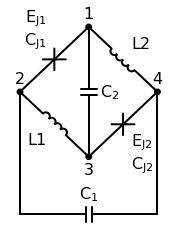

In [5]:
import SchemDraw
from SchemDraw import elements as e
d= SchemDraw.Drawing()
p1 = d.add(e.DOT, label='3', lblloc='bot')
d.add(e.JJ, label='$E_{J2}$\n$C_{J2}$', theta=45, lblloc='bot')
p2 = d.add(e.DOT, label='4')
d.add(e.INDUCTOR, label='$L2$', theta=135)
p3 = d.add(e.DOT, label='1')
d.add(e.JJ, label='$E_{J1}$\n$C_{J1}$', theta=225)
p4 = d.add(e.DOT, label='2')
d.add(e.INDUCTOR, label='$L1$', endpts=[p4.here, p1.here], lblloc='bot')
d.add(e.CAP, endpts=[p1.here, p3.here], label='$C_2$', lblloc='bot')
C2b = d.add(e.LINE, d='down', xy=p4.here, l=d.unit*4/3)
C2e = d.add(e.LINE, d='down', xy=p2.here, l=d.unit*4/3)
d.add(e.CAP, d='right', label='$C_1$', endpts=[C2b.end, C2e.end])
d.draw()

In [93]:
# Ground node is between L2 and 1
PKB = QCircuit()
PKB.add_element(QJosephsonJunction('JJ1'), [1, 2])
PKB.add_element(QCapacitance('CJ1'), [1, 2])
PKB.add_element(QInductance('L1'), [2, 3])
PKB.add_element(QJosephsonJunction('JJ2'), [3, 4])
PKB.add_element(QCapacitance('CJ2'), [3, 4])
PKB.add_element(QInductance('L2'), [4, 'GND'])
PKB.add_element(QCapacitance('C1'), [2, 4])
PKB.add_element(QCapacitance('C2'), [1, 3])

φ = QVariable('φ')
θ = QVariable('θ')
ζ = QVariable('ζ')
φx = QVariable('φ_x')

φ.create_grid(160, 12)
θ.create_grid(32, 1, centre=np.pi/2.)
ζ.create_grid(32, 1)
φx.set_parameter(0,0)

PKB.add_variable(φ)
PKB.add_variable(θ)
PKB.add_variable(ζ)
PKB.add_variable(φx)

Substitutions form paper:
$$
\begin{pmatrix}
    2\varphi \\
    2\zeta \\
    2\theta \\
    2\Sigma
\end{pmatrix} 
=
\begin{pmatrix}
    -1 & +1 & -1 & +1 \\
    +1 & +1 & -1 & -1 \\
    -1 & +1 & +1 & -1 \\
    +1 & +1 & +1 & +1 
\end{pmatrix} 
\begin{pmatrix}
    \varphi_1 \\
    \varphi_2 \\
    \varphi_3 \\
    \varphi_4 \\
\end{pmatrix}
$$
Adding extra "ground" node between $L_2$ and node 1; 
$$\varphi_{1} = \varphi_{\mathrm{GND}} + \varphi_x$$

In [94]:
node_map = \
np.linalg.inv(0.5*np.asarray([[-1, +1, -1, +1],
                              [+1, +1, -1, -1],
                              [-1, +1, +1, -1],
                              [+1, +1, +1, +1]]))
node_map*2

array([[-1.,  1., -1.,  1.],
       [ 1.,  1.,  1.,  1.],
       [-1., -1.,  1.,  1.],
       [ 1., -1., -1.,  1.]])

In [95]:
node_map = 0.5*np.asarray([[-1, +1, -1, +2], 
                           [-1, +1, -1,  0],
                           [+1, +1, +1,  0],
                           [-1, -1, +1,  0], 
                           [+1, -1, -1,  0]])
PKB.map_nodes_linear(['GND', 1, 2, 3, 4], ['φ', 'ζ', 'θ', 'φ_x'], node_map)

In [96]:
E_J, E_CJ, E_L, E_C = sympy.symbols('E_J, E_{CJ}, E_L, E_C')

PKB.find_element('JJ1').set_critical_current(E_J)
PKB.find_element('JJ2').set_critical_current(E_J)
PKB.find_element('CJ1').set_capacitance(1/(8*E_CJ))
PKB.find_element('CJ2').set_capacitance(1/(8*E_CJ))
PKB.find_element('L1').set_inductance(1/(2*E_L))
PKB.find_element('L2').set_inductance(1/(2*E_L))
PKB.find_element('C1').set_capacitance(1/(8*E_C))
PKB.find_element('C2').set_capacitance(1/(8*E_C))
sympy.trigsimp(sympy.nsimplify(PKB.symbolic_hamiltonian()))


-E_C*E_{CJ}*\partial_{θ}**2/(2*(E_C/4 + E_{CJ}/4)) - 2*E_C*\partial_{ζ}**2 + E_J*(1 - cos(θ - φ)) + E_J*(1 - cos(θ + φ)) + E_L*(ζ + φ)**2 + E_L*(-ζ + φ - φ_x)**2 - 2*E_{CJ}*\partial_{φ}**2

# Parameter set 1

In [97]:
E_C = 0.02
E_CJ = 20
E_J = 10
E_L = 0.008

PKB.find_element('JJ1').set_critical_current(E_J)
PKB.find_element('JJ2').set_critical_current(E_J)
PKB.find_element('CJ1').set_capacitance(1/(8*E_CJ))
PKB.find_element('CJ2').set_capacitance(1/(8*E_CJ))
PKB.find_element('L1').set_inductance(1/(2*E_L))
PKB.find_element('L2').set_inductance(1/(2*E_L))
PKB.find_element('C1').set_capacitance(1/(8*E_C))
PKB.find_element('C2').set_capacitance(1/(8*E_C))
ζ.set_parameter(0,0)

In [98]:
eigenenergies = []
fluxes = np.linspace(0, 2*np.pi, 27)
for flux_id_, flux in enumerate(tqdm.tqdm_notebook(fluxes)):
    φx.set_parameter(flux, 0)
    PKB.calculate_potentials()
    energies, wavefunctions = PKB.diagonalize_phase(num_states=6, maxiter=10000)
    eigenenergies.append(energies)

<ipython-input-98-6a6b2132b12c>:3: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for flux_id_, flux in enumerate(tqdm.tqdm_notebook(fluxes)):


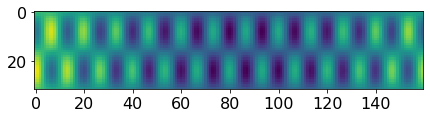

In [99]:
plt.imshow(np.squeeze(PKB.phase_potential).T)

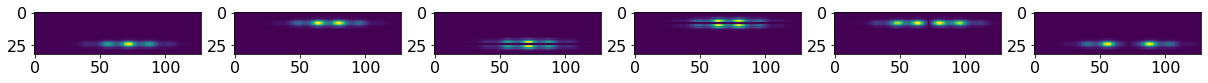

In [92]:
fig, axes = plt.subplots(1,6,figsize=(18,4))
for i in range(6):
    axes[i].imshow(np.squeeze(np.abs(wavefunctions[..., i])).T)

C:\ProgramData\Anaconda3\envs\py38\lib\site-packages\numpy\core\_asarray.py:85: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


([<matplotlib.axis.YTick at 0x1e6c2933d60>,
 <a list of 11 Text yticklabel objects>)

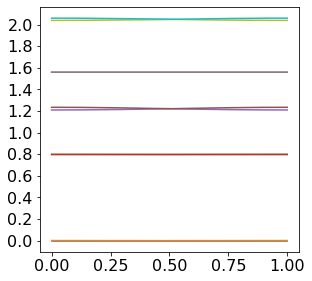

In [88]:
plt.figure(figsize=(4,4))
plt.plot(fluxes/(2*np.pi), (np.asarray(eigenenergies).T - np.min(eigenenergies, axis=1)).T)
plt.yticks(np.linspace(0,2, 11))